# C5: RANDOM FOREST AND ENSEMBLE LEARNING

## Model Evaluation

- **Definition:** The process of assessing how well a trained model performs on unseen data.  
- **Purpose:** To check if the model generalizes well, not just memorizes the data.  
- **Data used:** Typically done on validation and test datasets.  
- **Methods:**
    - Train/Test split
    - Cross-validation
    - Bootstrapping
- **Goal:** To select the best model and avoid overfitting or underfitting.

### Bootstrap

- A sampling method that selects random data **with replacement** from the original dataset to create a new dataset.  
- Used to create diversity in ensemble models.

## Model Performance Metrics

### For Classification

- Accuracy
- Precision
- Recall
- F1 Score
- Specificity
- ROC-AUC
- Log Loss / Cross-Entropy

### For Regression

- Mean Absolute Error (MAE)  
- Mean Squared Error (MSE)  
- Root Mean Squared Error (RMSE)  
- $R^2$ (Coefficient of Determination)  
- Adjusted $R^2$

### For Clustering

- Silhouette Score
- Davies-Bouldin Index
- Calinski-Harabasz Index

## Overfitting in Decision Trees

Overfitting occurs when a decision tree becomes too complex and learns not only general patterns but also noise and random fluctuations in the training data.

- **Cause:** Tree grows too deep with too many branches.  
- **Effect:** Model performs very well on training data but poorly on unseen data.  
- **Symptoms:**
    - High training accuracy but lower test accuracy
    - Many tiny splits that capture outliers or rare cases
- **Prevention:**
    - Pruning
    - Max depth
    - Minimum samples split
    - Max features
    - Using ensemble methods


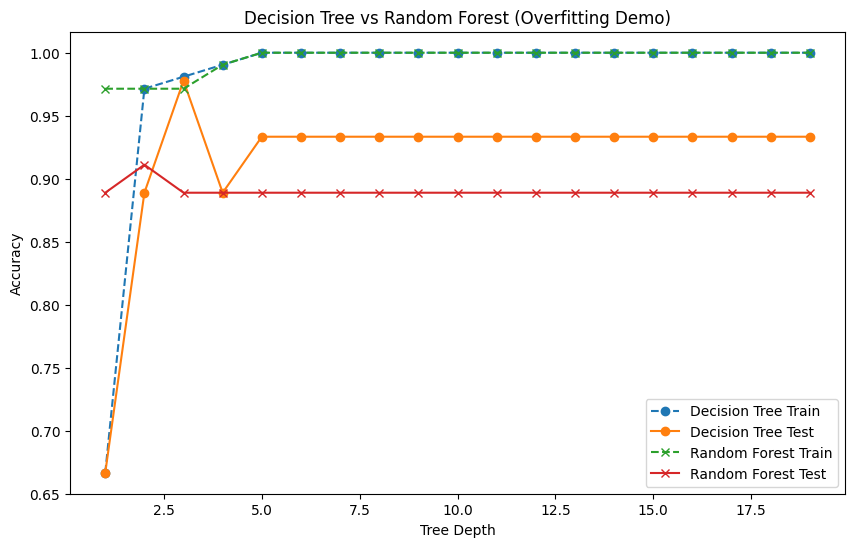

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

depths = range(1, 20)
dt_train_acc, dt_test_acc = [], []
rf_train_acc, rf_test_acc = [], []

for d in depths:
    # Decision Tree
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    dt_train_acc.append(accuracy_score(y_train, dt.predict(X_train)))
    dt_test_acc.append(accuracy_score(y_test, dt.predict(X_test)))
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=50, max_depth=d, random_state=42)
    rf.fit(X_train, y_train)
    rf_train_acc.append(accuracy_score(y_train, rf.predict(X_train)))
    rf_test_acc.append(accuracy_score(y_test, rf.predict(X_test)))

# Plot
plt.figure(figsize=(10,6))
plt.plot(depths, dt_train_acc, label="Decision Tree Train", linestyle="--", marker="o")
plt.plot(depths, dt_test_acc, label="Decision Tree Test", marker="o")
plt.plot(depths, rf_train_acc, label="Random Forest Train", linestyle="--", marker="x")
plt.plot(depths, rf_test_acc, label="Random Forest Test", marker="x")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree vs Random Forest (Overfitting Demo)")
plt.legend()
plt.show()


## Hyperparameters

- **Definition:** External settings or configurations of a machine learning model that can be set before training.  
- **Purpose:** They control the learning process and model complexity.  
- **Note:** They are not learned from data and must be set manually or tuned.  
- **Uses:**  
    - Directly affect model performance.  
    - Usually tuned using Grid Search, Random Search, or Bayesian Optimization.


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
X, y = load_iris(return_X_y=True)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Overfitting with no constraints (deep tree)
overfit_tree = DecisionTreeClassifier(random_state=42)
overfit_tree.fit(X_train, y_train)

print("Overfit Tree - Train Accuracy:", accuracy_score(y_train, overfit_tree.predict(X_train)))
print("Overfit Tree - Test Accuracy :", accuracy_score(y_test, overfit_tree.predict(X_test)))

# 4. Preventing overfitting with hyperparameters
# - max_depth: limits tree depth
# - min_samples_split: minimum samples to split a node
# - min_samples_leaf: minimum samples in a leaf
regularized_tree = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=2
)
regularized_tree.fit(X_train, y_train)

print("Regularized Tree - Train Accuracy:", accuracy_score(y_train, regularized_tree.predict(X_train)))
print("Regularized Tree - Test Accuracy :", accuracy_score(y_test, regularized_tree.predict(X_test)))


Overfit Tree - Train Accuracy: 1.0
Overfit Tree - Test Accuracy : 1.0
Regularized Tree - Train Accuracy: 0.9428571428571428
Regularized Tree - Test Accuracy : 1.0


## Ensemble Learning

Ensemble learning is the process of combining multiple models, often weak learners, to create a stronger overall model.

### Types of Ensemble Methods

- Bagging
- Boosting
- Stacking

### Bagging (Bootstrap Aggregating)

- Train multiple models on random subsets of the data.  
- Predictions are **averaged** (for regression) or **voted** (for classification).  
- Example: Random Forest

### Boosting

- Models are trained **sequentially**, each new one focusing on errors of the previous.  
- Often improves accuracy but can overfit if not controlled.  
- Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost

### Stacking

- Multiple different models are trained.  
- Their outputs are fed into a **meta-model** that makes the final prediction.

### Uses

- Reduces variance  
- Reduces bias  
- Often achieves state-of-the-art performance  
- More robust and stable than individual models


In [10]:
# Ensemble Learning (Voting Classifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Base models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Ensemble
from sklearn.ensemble import VotingClassifier

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define individual models
log_clf = LogisticRegression(max_iter=1000)
tree_clf = DecisionTreeClassifier()
svm_clf = SVC(probability=True)  # probability=True required for soft voting

# Ensemble model (Voting)
ensemble_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('dt', tree_clf),
        ('svm', svm_clf)
    ],
    voting='soft'  # 'hard' for majority vote, 'soft' for weighted probabilities
)

# Train ensemble
ensemble_clf.fit(X_train, y_train)

# Evaluate
y_pred = ensemble_clf.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))


Ensemble Accuracy: 1.0


In [11]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Bagging with Decision Trees
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
bagging_clf.fit(X_train, y_train)
print("Bagging Accuracy:", accuracy_score(y_test, bagging_clf.predict(X_test)))

# Random Forest (bagging + feature randomness)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))


Bagging Accuracy: 1.0
Random Forest Accuracy: 1.0


In [12]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# AdaBoost
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ada_clf.fit(X_train, y_train)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_clf.predict(X_test)))

# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_clf.predict(X_test)))


AdaBoost Accuracy: 1.0
Gradient Boosting Accuracy: 1.0


In [13]:
# Random forest can rank features by their importance in prediction
import pandas as pd

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importance = pd.DataFrame({
    "Feature": iris.feature_names,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance)

             Feature  Importance
3   petal width (cm)    0.436574
2  petal length (cm)    0.417326
0  sepal length (cm)    0.104614
1   sepal width (cm)    0.041486
